In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('M&M.BO.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,127.224998,142.462494,124.000000,137.449997,104.768829,1800384.0
1,2009-05-05,137.250000,137.250000,127.750000,133.387497,101.672264,626584.0
2,2009-05-06,134.000000,134.500000,129.024994,132.850006,101.262589,1177800.0
3,2009-05-07,133.787506,134.975006,127.574997,129.087494,98.394661,890452.0
4,2009-05-08,128.000000,131.225006,121.687500,123.562500,94.183334,680736.0


In [3]:
# data = data.drop('Adj Close',axis=1)
data = data.dropna()

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
# Step 1: Prepare Data
features = ['Open', 'High', 'Low', 'Volume']  # Features used for prediction
X = data[features]
y = data['Close']
X,y

(            Open        High         Low     Volume
 0     127.224998  142.462494  124.000000  1800384.0
 1     137.250000  137.250000  127.750000   626584.0
 2     134.000000  134.500000  129.024994  1177800.0
 3     133.787506  134.975006  127.574997   890452.0
 4     128.000000  131.225006  121.687500   680736.0
 ...          ...         ...         ...        ...
 2634  532.900024  538.799988  531.650024   123258.0
 2635  538.799988  538.799988  530.400024    65928.0
 2636  534.400024  537.750000  529.599976    90459.0
 2637  537.000000  540.950012  533.450012   127766.0
 2638  540.650024  540.650024  530.500000    79676.0
 
 [2628 rows x 4 columns],
 0       137.449997
 1       133.387497
 2       132.850006
 3       129.087494
 4       123.562500
            ...    
 2634    536.500000
 2635    531.450012
 2636    536.599976
 2637    539.900024
 2638    532.650024
 Name: Close, Length: 2628, dtype: float64)

In [6]:
# Step 2: Train-Test Split
train_data = data[(data['Date'] >= '2009-05-04') & (data['Date'] <= '2017-04-03')]
test_data = data[(data['Date'] >= '2017-04-04') & (data['Date'] <= '2020-01-04')]

X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data['Close'], test_data['Close']
X_train,X_test,y_train,y_test

(            Open        High         Low     Volume
 0     127.224998  142.462494  124.000000  1800384.0
 1     137.250000  137.250000  127.750000   626584.0
 2     134.000000  134.500000  129.024994  1177800.0
 3     133.787506  134.975006  127.574997   890452.0
 4     128.000000  131.225006  121.687500   680736.0
 ...          ...         ...         ...        ...
 1957  637.474976  641.500000  635.075012    45560.0
 1958  639.950012  640.974976  631.750000    66354.0
 1959  633.049988  644.750000  630.525024    90612.0
 1960  640.200012  647.500000  636.750000   242610.0
 1961  647.275024  651.950012  638.525024   370766.0
 
 [1954 rows x 4 columns],
             Open        High         Low     Volume
 1962  642.750000  647.474976  635.049988  1199602.0
 1963  648.750000  648.750000  638.000000   102856.0
 1964  644.974976  646.500000  635.000000    80714.0
 1965  642.500000  642.500000  634.000000    68230.0
 1966  639.000000  642.500000  635.000000    79482.0
 ...          ... 

In [7]:
# Step 3: Model Training
rf_model = RandomForestRegressor() 
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'random_state': [42]
# }

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best model from the search
# best_rf_model = grid_search.best_estimator_

# # Print the best parameters found
# print("Best Parameters:", grid_search.best_params_)

In [9]:




# Step 4: Model Evaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Step 5: Prediction (if needed)
# new_data = ...  # Your new data
# predicted_close = rf_model.predict(new_data)


Mean Absolute Error: 32.99772280492565
Mean Squared Error: 4750.037668642536
Root Mean Squared Error: 68.92051703696467


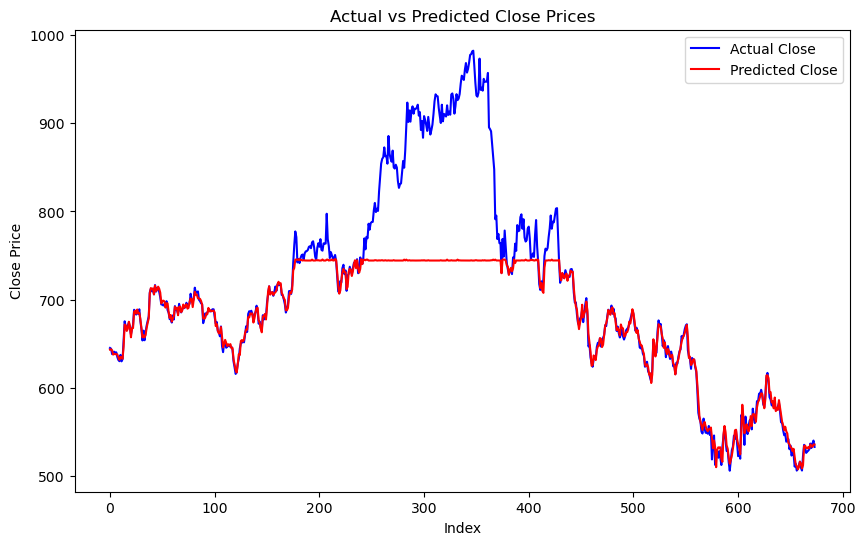

In [10]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted Close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()
